# **[PUBG Placement Predictor](https://adel-kayyali-pubg-predictor-main-e4qvc1.streamlit.app)**

<img src="https://wallpaperaccess.com/full/407315.png" alt="Paris" style="display: block;margin-left: auto;margin-right: auto;width: 100%;">

# **Objectives & Description**

## **Features Description**
*     **groupId** - Players team ID
*     **matchId** - Match ID
*     **assists** - Number of assisted kills. The killed is actually scored for the another teammate.
*     **boosts** - Number of boost items used by a player. These are for example: energy dring, painkillers, adrenaline syringe.
*     **damageDealt** - Damage dealt to the enemy
*     **DBNOs** - Down But No Out - when you lose all your HP but you're not killed yet. All you can do is only to crawl.
*     **headshotKills** - Number of enemies killed with a headshot
*     **heals** - Number of healing items used by a player. These are for example: bandages, first-aid kits
*     **killPlace** - Ranking in a match based on kills.
*     **killPoints** - Ranking in a match based on kills points.
*     **kills** - Number of enemy players killed.
*     **killStreaks** - Max number of enemy players killed in a short amount of time.
*     **longestKill** - Longest distance between player and killed enemy.
*     **matchDuration** - Duration of a mach in seconds.
*     **matchType** - Type of match. There are three main modes: Solo, Duo or Squad. In this dataset however we have much more categories.
*     **maxPlace** - The worst place we in the match.
*     **numGroups** - Number of groups (teams) in the match.
*     **revives** - Number of times this player revived teammates.
*     **rideDistance** - Total distance traveled in vehicles measured in meters.
*     **roadKills** - Number of kills from a car, bike, boat, etc.
*     **swimDistance** - Total distance traveled by swimming (in meters).
*     **teamKills** - Number teammate kills (due to friendly fire).
*     **vehicleDestroys** - Number of vehicles destroyed.
*     **walkDistance** - Total distance traveled on foot measured (in meters).
*     **weaponsAcquired** - Number of weapons picked up.
*     **winPoints** - Ranking in a match based on won matches.

#### **Target Column**
*     **winPlacePerc** - Normalised placement (rank). The 1st place is 1 and the last one is 0.


---

## **Objectives**
1. Predict final placement from final in-game stats and initial player ratings as asked in the problem. Get yourself ANY result (make a submission).
-> Made a [Deployed Webapp](https://adel-kayyali-pubg-predictor-main-e4qvc1.streamlit.app), and a [predictive system](https://colab.research.google.com/drive/1f1BS-lt363Y_5k50PNv0Ub0qsS1kWSna#scrollTo=SIO4R9snyULo&line=1&uniqifier=1).
2. Do a simple EDA on the available data, and specify the meaningful attributes contained.
-> Done in so many sections, Specially in [EDA & Preprocessing](https://colab.research.google.com/drive/1f1BS-lt363Y_5k50PNv0Ub0qsS1kWSna#scrollTo=evkNbrCCW7OS) section.
3. Extract the correlation matrix and articulate what did you conclude from it about the data.
-> done in the [Data Visualization - Correlation Matrix](https://colab.research.google.com/drive/1f1BS-lt363Y_5k50PNv0Ub0qsS1kWSna#scrollTo=2OW1Iqds0_6U&line=3&uniqifier=1) section.
4. Extract 5 additional features you can get from available data and explain why you picked them and their correlation with the target.
-> Done in The [Feature Engineering](https://colab.research.google.com/drive/1f1BS-lt363Y_5k50PNv0Ub0qsS1kWSna#scrollTo=JUz9Iurxe9jC) Section.
5. Identify outliers.
-> Done in the [Data Visualization - Outliers](https://colab.research.google.com/drive/1f1BS-lt363Y_5k50PNv0Ub0qsS1kWSna#scrollTo=8JYSBqaDdz5G) section.
6. Identify hackers and explain your method. 
-> Done in the [Data Visualization - Cheaters Detecting](https://colab.research.google.com/drive/1f1BS-lt363Y_5k50PNv0Ub0qsS1kWSna#scrollTo=YrSUC4tSHXmf&line=1&uniqifier=1) section.
7. Spot Away From Keyboard (AFK) players and explain your method.
-> Done [Right Here](https://colab.research.google.com/drive/1f1BS-lt363Y_5k50PNv0Ub0qsS1kWSna#scrollTo=8n-GN-GIPJDD&line=1&uniqifier=1).

---

In [ ]:
import pandas as pd 
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import pickle
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# **Importing the Data**

In [ ]:
train = pd.read_csv('train_V2.csv')
pd.set_option('display.max_columns', None)
train

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,matchDuration,matchType,maxPlace,numGroups,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0.0,0.0,0.00,0.0,0.0,0.0,60.0,1241.0,0.0,0.0,0.00,1306.0,squad-fpp,28.0,26.0,-1.0,0.0,0.0000,0.0,0.00,0.0,0.0,244.80,1.0,1466.0,0.4444
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0.0,0.0,91.47,0.0,0.0,0.0,57.0,0.0,0.0,0.0,0.00,1777.0,squad-fpp,26.0,25.0,1484.0,0.0,0.0045,0.0,11.04,0.0,0.0,1434.00,5.0,0.0,0.6400
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1.0,0.0,68.00,0.0,0.0,0.0,47.0,0.0,0.0,0.0,0.00,1318.0,duo,50.0,47.0,1491.0,0.0,0.0000,0.0,0.00,0.0,0.0,161.80,2.0,0.0,0.7755
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0.0,0.0,32.90,0.0,0.0,0.0,75.0,0.0,0.0,0.0,0.00,1436.0,squad-fpp,31.0,30.0,1408.0,0.0,0.0000,0.0,0.00,0.0,0.0,202.70,3.0,0.0,0.1667
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0.0,0.0,100.00,0.0,0.0,0.0,45.0,0.0,1.0,1.0,58.53,1424.0,solo-fpp,97.0,95.0,1560.0,0.0,0.0000,0.0,0.00,0.0,0.0,49.75,2.0,0.0,0.1875
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
459522,20f169032d5db4,74bb6b0638dcb6,04139a70f7cd07,0.0,3.0,254.90,3.0,0.0,1.0,20.0,0.0,2.0,2.0,24.10,1381.0,duo-fpp,49.0,48.0,1523.0,0.0,0.0000,0.0,0.00,0.0,0.0,1341.00,4.0,0.0,0.6042
459523,5ed5ad8ff41af0,befddab6a2654f,6de03c863ccb50,0.0,2.0,76.09,2.0,1.0,1.0,16.0,0.0,2.0,1.0,66.01,1399.0,squad,30.0,30.0,1514.0,0.0,0.0000,0.0,0.00,0.0,0.0,3534.00,2.0,0.0,1.0000
459524,56e09564b094dd,2f457957303a08,28aaade3d84c3f,0.0,0.0,224.00,0.0,0.0,0.0,80.0,0.0,0.0,0.0,0.00,1390.0,squad-fpp,29.0,29.0,1422.0,0.0,0.0000,0.0,0.00,0.0,0.0,91.93,1.0,0.0,0.2143
459525,f5e6c670a0101b,e04532feb6026c,d525c2f7b62ec3,0.0,0.0,33.70,0.0,0.0,0.0,35.0,0.0,1.0,1.0,74.01,1776.0,solo,96.0,93.0,1519.0,0.0,0.0000,0.0,0.00,0.0,0.0,183.50,2.0,0.0,0.1474




---


# **EDA & Preprocessing**

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 459527 entries, 0 to 459526
Data columns (total 29 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Id               459527 non-null  object 
 1   groupId          459527 non-null  object 
 2   matchId          459526 non-null  object 
 3   assists          459526 non-null  float64
 4   boosts           459526 non-null  float64
 5   damageDealt      459526 non-null  float64
 6   DBNOs            459526 non-null  float64
 7   headshotKills    459526 non-null  float64
 8   heals            459526 non-null  float64
 9   killPlace        459526 non-null  float64
 10  killPoints       459526 non-null  float64
 11  kills            459526 non-null  float64
 12  killStreaks      459526 non-null  float64
 13  longestKill      459526 non-null  float64
 14  matchDuration    459526 non-null  float64
 15  matchType        459526 non-null  object 
 16  maxPlace         459526 non-null  floa

I have only 1 Categorical feature, all the others are Numerical.

In [ ]:
train.describe()

,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,matchDuration,maxPlace,numGroups,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
count,459526.000000,459526.000000,459526.000000,459526.000000,459526.000000,459526.000000,459526.000000,459526.000000,459526.000000,459526.000000,459526.000000,459526.000000,459526.000000,459526.000000,459526.000000,459526.000000,459526.000000,459526.000000,459526.000000,459526.000000,459526.000000,459526.000000,459526.000000,459526.000000,459526.000000
mean,0.232085,1.108057,130.730575,0.656931,0.226964,1.368099,47.588946,506.653713,0.925138,0.545036,22.958974,1579.117784,44.455278,42.962951,889.817427,0.164134,604.892110,0.003604,4.530754,0.023772,0.007469,1154.348174,3.662441,608.613060,0.472727
std,0.586810,1.714843,171.010884,1.143775,0.601274,2.669549,27.462713,627.708039,1.556692,0.711590,50.920889,258.624788,23.809071,23.267127,737.049276,0.468222,1489.420662,0.077191,30.515558,0.167615,0.089420,1182.296170,2.457177,740.118987,0.307330
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,152.000000,2.000000,1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,24.000000,0.000000,0.000000,0.000000,0.000000,1367.000000,28.000000,27.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,155.625000,2.000000,0.000000,0.200000
50%,0.000000,0.000000,84.420000,0.000000,0.000000,0.000000,47.000000,0.000000,0.000000,0.000000,0.000000,1438.000000,30.000000,30.000000,1443.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,687.300000,3.000000,0.000000,0.458300
75%,0.000000,2.000000,185.900000,1.000000,0.000000,2.000000,71.000000,1172.000000,1.000000,1.000000,21.250000,1850.000000,49.000000,47.000000,1500.000000,0.000000,0.205325,0.000000,0.000000,0.000000,0.000000,1976.000000,5.000000,1495.000000,0.740700
max,21.000000,33.000000,6616.000000,32.000000,40.000000,52.000000,100.000000,2152.000000,65.000000,14.000000,1026.000000,2237.000000,100.000000,100.000000,5580.000000,17.000000,31960.000000,8.000000,2295.000000,10.000000,4.000000,13530.000000,128.000000,2001.000000,1.000000


#### **Data Cleaning**

##### **Null and Duplicated Data**

In [ ]:
train = train.drop_duplicates()

In [ ]:
train.isnull().sum()

Id                 0
groupId            0
matchId            1
assists            1
boosts             1
damageDealt        1
DBNOs              1
headshotKills      1
heals              1
killPlace          1
killPoints         1
kills              1
killStreaks        1
longestKill        1
matchDuration      1
matchType          1
maxPlace           1
numGroups          1
rankPoints         1
revives            1
rideDistance       1
roadKills          1
swimDistance       1
teamKills          1
vehicleDestroys    1
walkDistance       1
weaponsAcquired    1
winPoints          1
winPlacePerc       1
dtype: int64

In [ ]:
train.dropna(subset='winPlacePerc',inplace=True)
train.isnull().sum()

Id                 0
groupId            0
matchId            0
assists            0
boosts             0
damageDealt        0
DBNOs              0
headshotKills      0
heals              0
killPlace          0
killPoints         0
kills              0
killStreaks        0
longestKill        0
matchDuration      0
matchType          0
maxPlace           0
numGroups          0
rankPoints         0
revives            0
rideDistance       0
roadKills          0
swimDistance       0
teamKills          0
vehicleDestroys    0
walkDistance       0
weaponsAcquired    0
winPoints          0
winPlacePerc       0
dtype: int64

I wanted to drop the only 1 Null value from my target Column. fortunately, all the Null values were in the same row so when I droped it from my DataFrame I dropped all the other Null values too.



---



#### **Feature Engineering**

##### **Total Distance & AFK**

In [ ]:
train['totalDistance'] = train['rideDistance'] + train['swimDistance'] + train['walkDistance']
train['totalDistance']

0          244.8000
1         1445.0445
2          161.8000
3          202.7000
4           49.7500
            ...    
459521    2307.6000
459522    1341.0000
459523    3534.0000
459524      91.9300
459525     183.5000
Name: totalDistance, Length: 459526, dtype: float64

I have made a new feature that calculates the Total distance each player has moved.

---

Now, I want to calculate the number of players that stayed **AFK** in the whole match by Summing all the total distances and getting 0 as a resault, which means that the player moved 0 distance and That's known as **AFK** (Away-From-Keyboard).

In [ ]:
print('Number of players that stayed AFK in the matches:',(train['totalDistance'] == 0).sum())
print('Number of the records that I have in the train dataset:',train.shape[0])

Number of players that stayed AFK in the matches: 9935
Number of the records that I have in the train dataset: 459526


There are **12710** who stayed **AFK** in the match which are outliers, I'll need to deal with them.

In [ ]:
train.drop(train[train['totalDistance'] == 0].index, inplace=True)
print('Number of AFK players in the DataSet Now:',(train['totalDistance'] == 0).sum())
print('Number of the records that I have in the train dataset Now:',train.shape[0])

Number of AFK players in the DataSet Now: 0
Number of the records that I have in the train dataset Now: 449591


---

##### **Total of picked up items** (Boosts, Heals and Weapons Stuffs)

In [ ]:
train['totalItemsPicked'] = train['boosts'] + train['heals'] + train['weaponsAcquired']
train['totalItemsPicked'].describe()

count    449591.000000
mean          6.258144
std           5.313366
min           0.000000
25%           2.000000
50%           5.000000
75%           9.000000
max         128.000000
Name: totalItemsPicked, dtype: float64

Merged all the items that may be picked up into one feature

---

##### **Damage Dealt by a Team**

In [ ]:
train['totalDamageByTeam'] = train.groupby('groupId').damageDealt.transform('sum')

Merged all the damage dealt by a team into 1 value

---

##### **Total Kills by a Team**

In [ ]:
train['totalKillsByTeam'] =  train.groupby('groupId').kills.transform('sum')

Merged the Total kills scored by a Team.

---

##### **Total Heals and Boosts**

In [ ]:
train['healsAndBoosts'] = train['heals'] + train['boosts']

Merged the heals and boosts into 1 feature

---

##### **Total Buffs used in a Team**

In [ ]:
train['totalTeamBuffs'] = train.groupby('groupId').healsAndBoosts.transform('sum')

Merged the Total buffs used in a single team.

---

##### **Teamwork**

In [ ]:
train['teamwork'] = train['assists'] + train['revives']

Merged the assists and revives into one feature.


---

##### **Self Healing & Boosting**

In [ ]:
train['healsAndBoosts'] = train['heals'] + train['boosts']

Merged the number of heals and number of boosts into one feature.

---

Now these feature are not useful because we used them in another features that we merged earlier. If I didn't drop them, they will double effect on my model negativly. So, I'll drop them.

In [ ]:
train = train.drop(axis=1,labels=['Id','matchId','groupId','rideDistance','swimDistance','walkDistance','rankPoints',
                                  'killPoints','winPoints','weaponsAcquired','boosts','heals', 'revives','assists'])

#### **Data Visualization & Adjustment**

##### **Cheaters Detecting**

###### **kills with 0 Distance Moved**

In [ ]:
print(((train['kills'] > 0) & (train['totalDistance'] == 0)==True).sum())

0


I calculated the number of players who got kills while they moved 0 Total distance in the whole match, because they may be cheaters which is an Outlier. Luckly, there are 0 of those players in this dataset.



---

###### **Kills > 30**

I will detect players who got more than 30 kills in a single match and who got more than 10 roadkills, they will be either cheaters or outliers.

In [ ]:
train['cheater'] = ((train['kills'] > 30) | (train['roadKills'] > 10)).astype(int)
train['cheater'].value_counts()

0    449583
1         8
Name: cheater, dtype: int64

In [ ]:
train.drop(train[train['cheater']==1].index, inplace=True)
train['cheater'].value_counts()

0    449583
Name: cheater, dtype: int64

I got 9 records may be cheaters, or just an outliers. in both ways I'll need to drop them.

---

###### **Very Long Distance Kill**

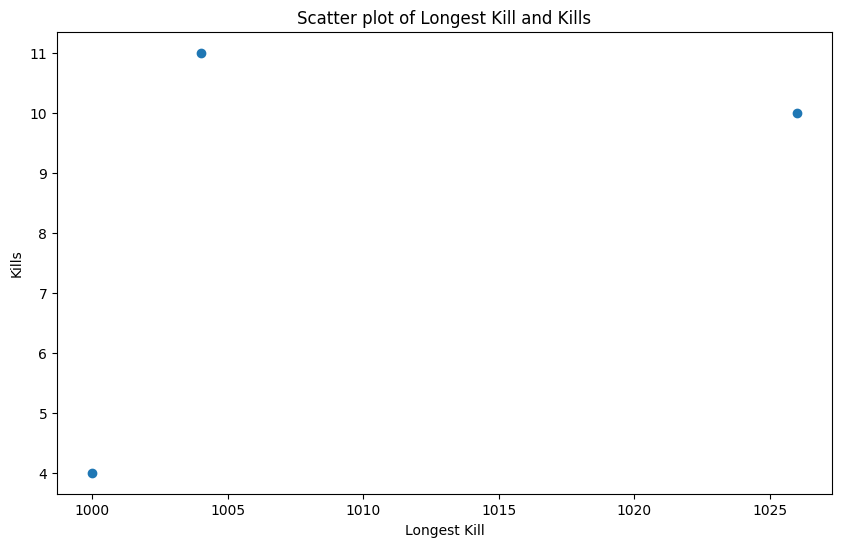

In [ ]:
dist = train[train['longestKill']>=1000]
plt.figure(figsize=(10, 6))
plt.scatter(dist['longestKill'], dist['kills'])
plt.xlabel('Longest Kill')
plt.ylabel('Kills')
plt.title('Scatter plot of Longest Kill and Kills')
plt.show()

I got many players that got so many kills from a range that's more than 1000 Meters, it's a bit unrealistic and might be cheating! but from another side with a 8x scope, a static target, very good position and a lot of luck it is possible. 

So it is either a cheater or an outlier, bothways I'll be dropping them from my DataFrame.
![Imgur](https://zilliongamer.com/uploads/pubg-m/guide/sniper/map-range.jpg)

In [ ]:
train.drop(train[train['longestKill'] > 1000].index, inplace=True)
train[train['longestKill'] > 1000].sum().sum()

0.0

In [ ]:
train = train.drop(axis=1,labels=['cheater'])

---

In [ ]:
train.columns

Index(['damageDealt', 'DBNOs', 'headshotKills', 'killPlace', 'kills',
       'killStreaks', 'longestKill', 'matchDuration', 'matchType', 'maxPlace',
       'numGroups', 'roadKills', 'teamKills', 'vehicleDestroys',
       'winPlacePerc', 'totalDistance', 'totalItemsPicked',
       'totalDamageByTeam', 'totalKillsByTeam', 'healsAndBoosts',
       'totalTeamBuffs', 'teamwork'],
      dtype='object')

In [ ]:
new_order = ['damageDealt', 'DBNOs', 'headshotKills', 'killStreaks',
       'longestKill', 'matchType',
       'numGroups', 'totalDistance',
       'totalItemsPicked', 'totalDamageByTeam', 'totalKillsByTeam',
       'healsAndBoosts', 'totalTeamBuffs', 'teamwork', 'winPlacePerc']
train = train.reindex(columns=new_order)

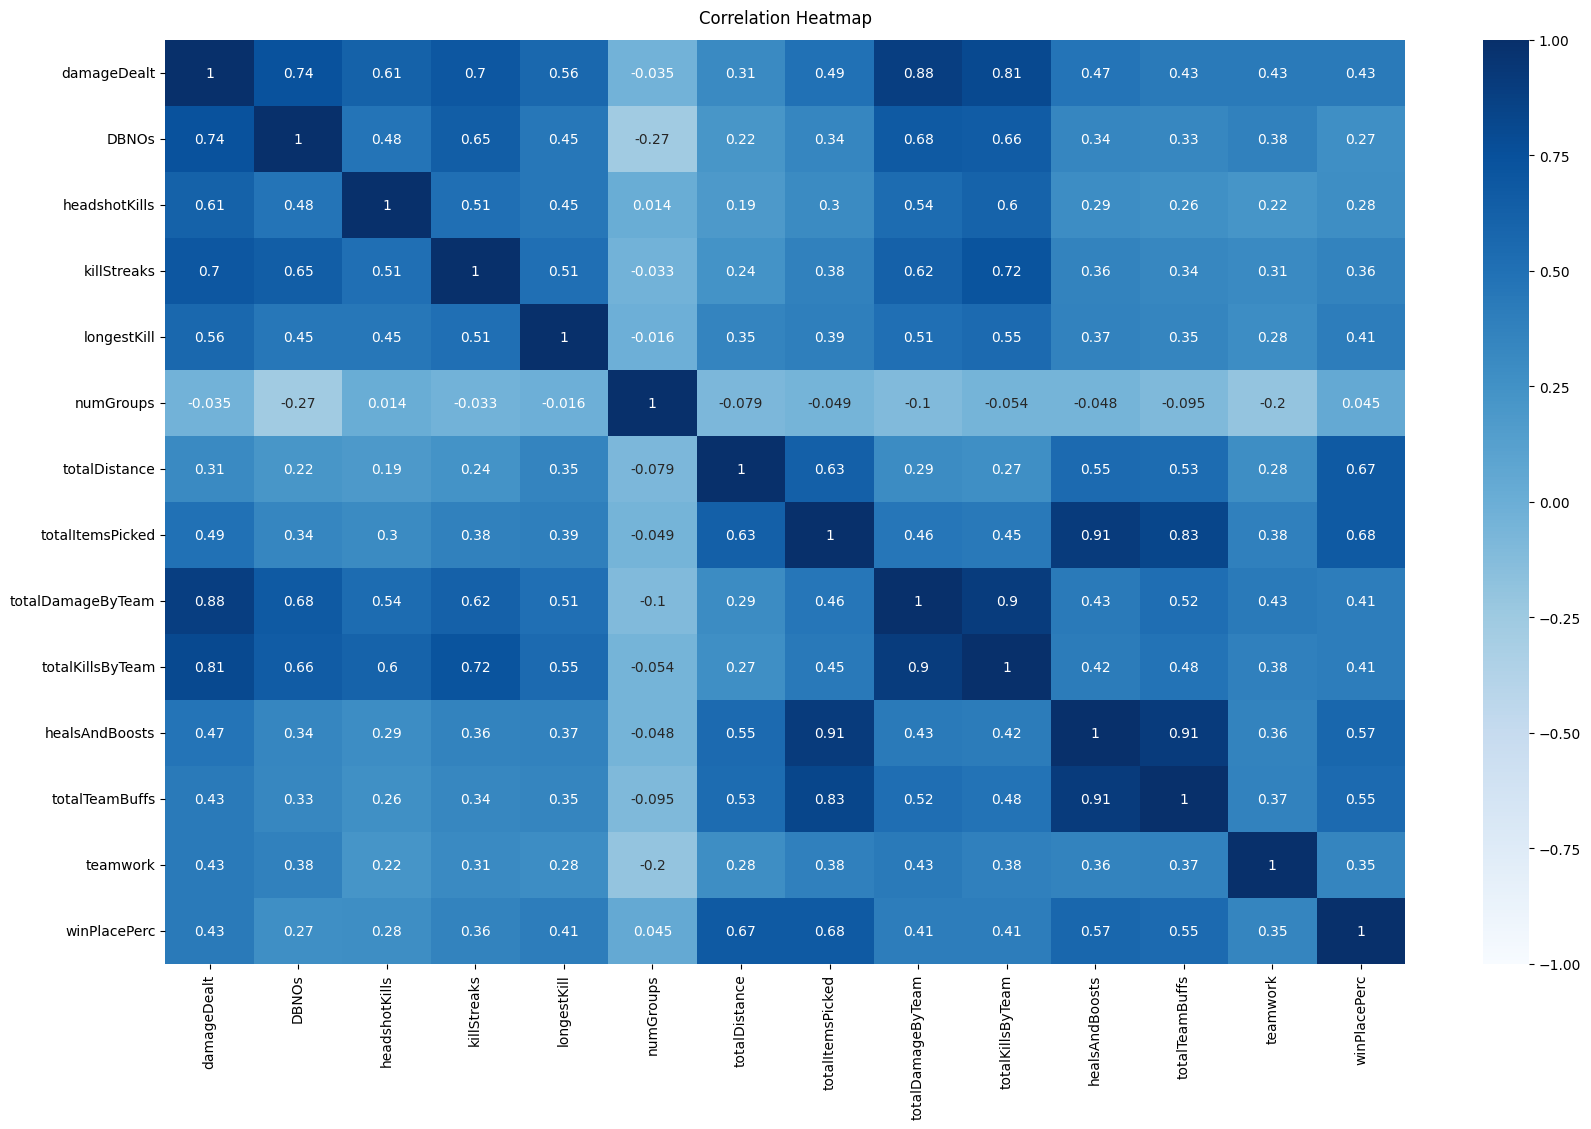

In [ ]:
plt.figure(figsize=(20, 12))
heatmap = sns.heatmap(train.corr(), vmin=-1, vmax=1, annot=True, cmap="Blues")
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

We can notice that:

1. `totalKillsByTeam` and `totalDamageByTeam` 
2. `healsAndBoosts` and `totalTeamBuffs`
3. `totalItemsPicked` and `healsAndBoosts`

**All of them are strongly positive correlated.**

---

##### **Transforming (numGroups) Feature**

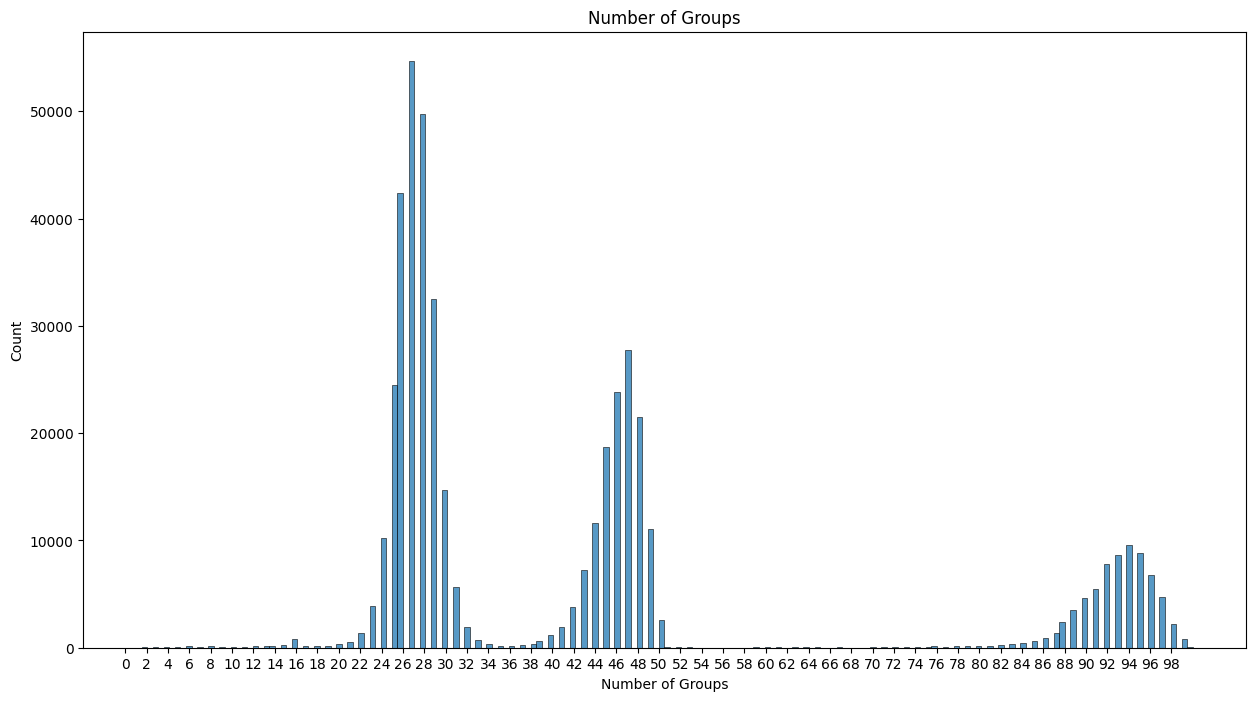

In [ ]:
plt.figure(figsize=(15,8))
fig = sns.histplot(data=train, x="numGroups")
fig.set_title("Number of Groups")
plt.xlabel("Number of Groups")
plt.xticks(range(0, 100, 2))
plt.show()

In [ ]:
bins = [-1, 35, 66, 100]
labels = ['0-35', '36-66', '67-100']
train['numGroups_bins'] = pd.cut(train['numGroups'], bins=bins, labels=labels)
print(train['numGroups_bins'].value_counts())

0-35      246304
36-66     132824
67-100     70453
Name: numGroups_bins, dtype: int64


As it's shown in the previous plot, The `numGroups` has 3 main Peeks: `0-35`, `36-66` and `67-100`. So I decided to slice this attribute into 3 main groups because I believe it will affect the Model Positivly (*when there are less Groups in the match, it will be a higher chance to win!*)

As a resault, I have 2 Categorical Values now.

---

##### **MatchType feature Reduction and Modifying**

<Axes: >

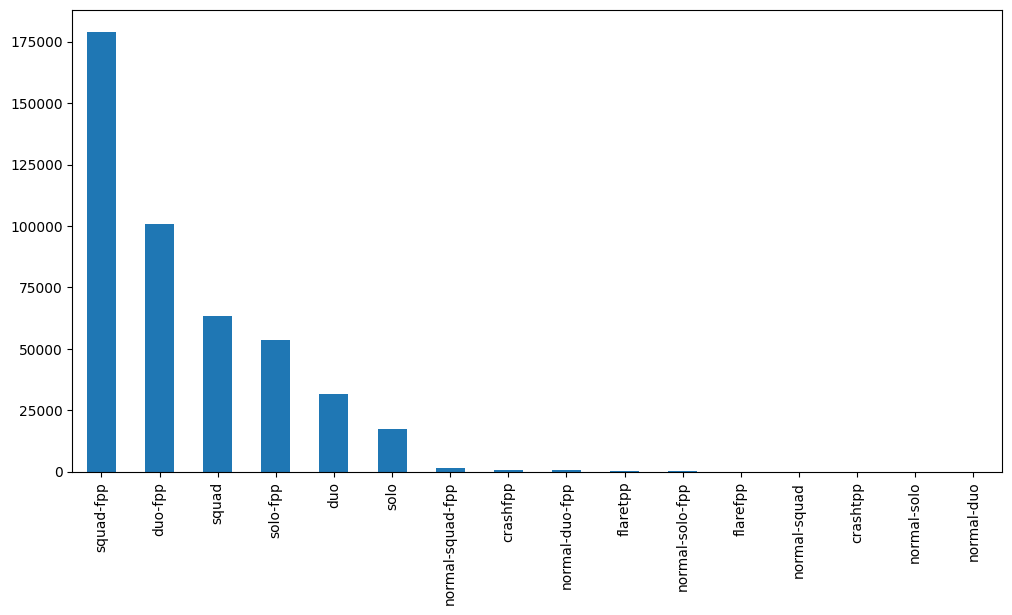

In [ ]:
plt.figure(figsize=(12,6))
train['matchType'].value_counts().plot(kind='bar')

In [ ]:
indices = train[train['matchType'] == 'crashfpp'].index
train = train.drop(index=indices)


indices = train[train['matchType'] == 'crashtpp'].index
train = train.drop(index=indices)


indices = train[train['matchType'] == 'flaretpp'].index
train = train.drop(index=indices)


indices = train[train['matchType'] == 'flarefpp'].index
train = train.drop(index=indices)

I dropped all the `crash` & `flare` values because their volume is not high and they will not make the Model better.

<Axes: >

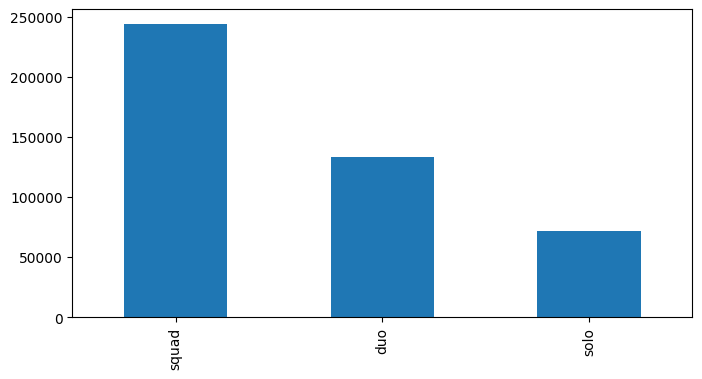

In [ ]:
squad_mapping = {'squad-fpp': 'squad', 'normal-squad-fpp': 'squad', 'normal-squad': 'squad'}
train['matchType'] = train['matchType'].replace(squad_mapping)


solo_mapping = {'solo-fpp': 'solo', 'normal-solo-fpp': 'solo', 'normal-solo': 'solo'}
train['matchType'] = train['matchType'].replace(solo_mapping)


duo_mapping = {'duo-fpp': 'duo', 'normal-duo-fpp': 'duo', 'normal-duo': 'duo'}
train['matchType'] = train['matchType'].replace(duo_mapping)


plt.figure(figsize=(8,4))
train['matchType'].value_counts().plot(kind='bar')

In [ ]:
train.drop('numGroups', axis=1, inplace=True)

I merged all the types to those 3 main types, it will allow me to deal with my model easier and give me a much clearer view to the data.



---



##### **Dealing with outliers**

In [ ]:
train.columns.shape

(15,)

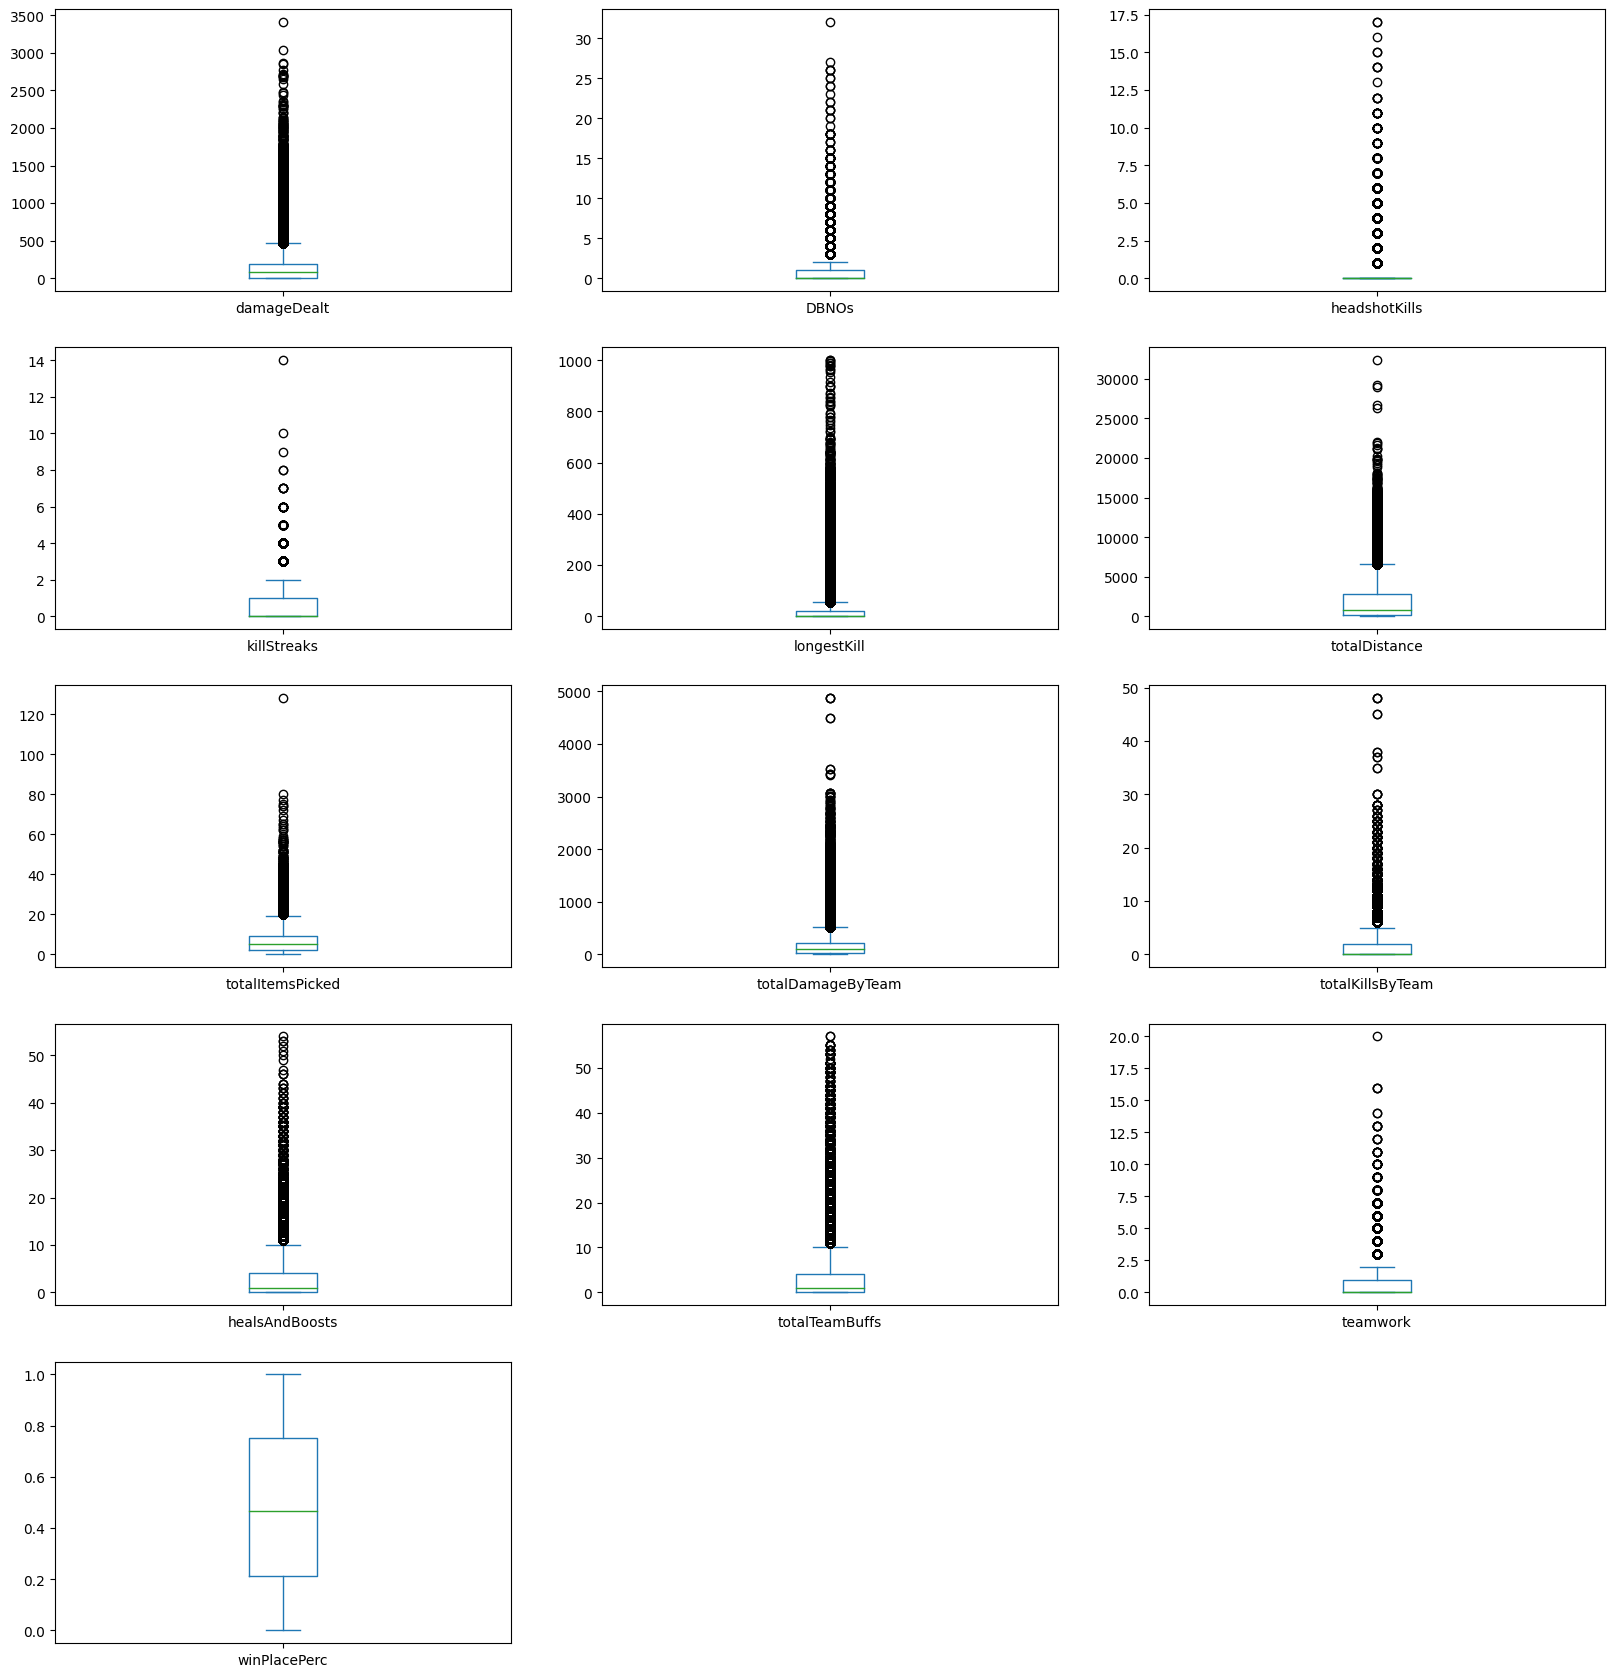

In [ ]:
fig = plt.figure(figsize=(20, 30))

i = 1
for col in train[['damageDealt', 'DBNOs', 'headshotKills',
       'killStreaks', 'longestKill',
       'totalDistance', 'totalItemsPicked',
       'totalDamageByTeam', 'totalKillsByTeam', 'healsAndBoosts',
       'totalTeamBuffs', 'teamwork', 'winPlacePerc']]:
  if i < 14:
    fig.add_subplot(7,3,i)
    i += 1
    train[col].plot(kind='box')
  else:
    break

<Axes: ylabel='killStreaks'>

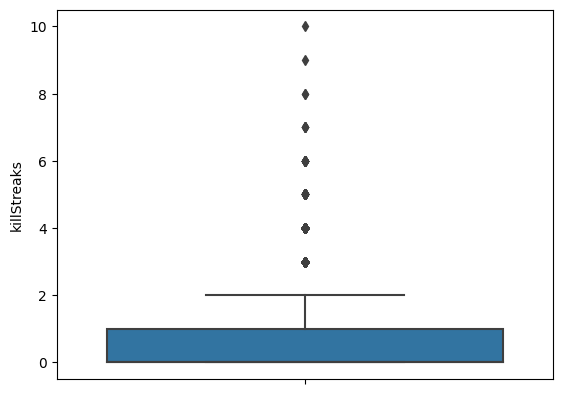

In [ ]:
median_killstreaks = train['killStreaks'].median()
train.loc[train['killStreaks'] > 12, 'killStreaks'] = median_killstreaks

sns.boxplot(y=train['killStreaks'])

<Axes: ylabel='DBNOs'>

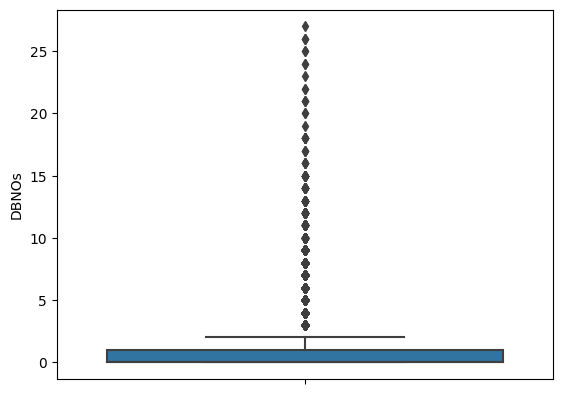

In [ ]:
median_DBNOs = train['DBNOs'].median()
train.loc[train['DBNOs'] > 29, 'DBNOs'] = median_DBNOs

sns.boxplot(y=train['DBNOs'])

<Axes: ylabel='totalDistance'>

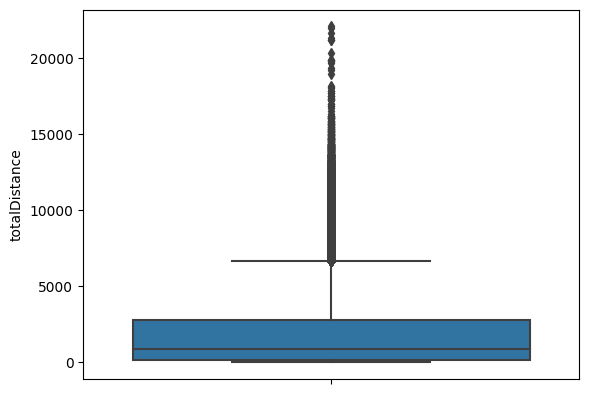

In [ ]:
median_totalDistance = train['totalDistance'].median()
train.loc[train['totalDistance'] > 25000, 'totalDistance'] = median_totalDistance

sns.boxplot(y=train['totalDistance'])

- - -

<Axes: ylabel='totalItemsPicked'>

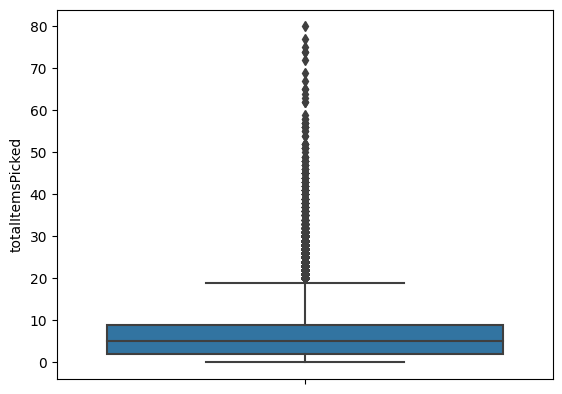

In [ ]:
median_totalItemsPicked = train['totalItemsPicked'].median()
train.loc[train['totalItemsPicked'] > 100, 'totalItemsPicked'] = median_totalItemsPicked

sns.boxplot(y=train['totalItemsPicked'])

<Axes: ylabel='totalDamageByTeam'>

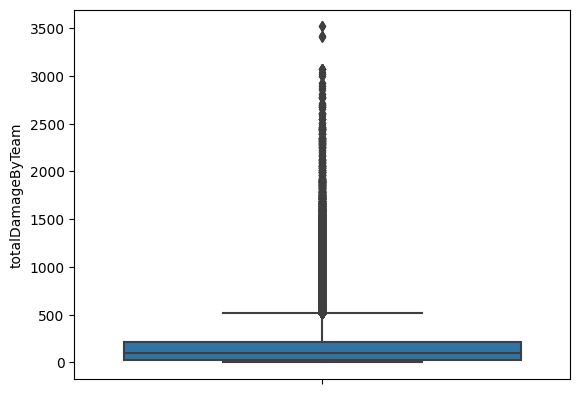

In [ ]:
median_totalDamageByTeam = train['totalDamageByTeam'].median()
train.loc[train['totalDamageByTeam'] > 3900, 'totalDamageByTeam'] = median_totalDamageByTeam

sns.boxplot(y=train['totalDamageByTeam'])

<Axes: ylabel='totalKillsByTeam'>

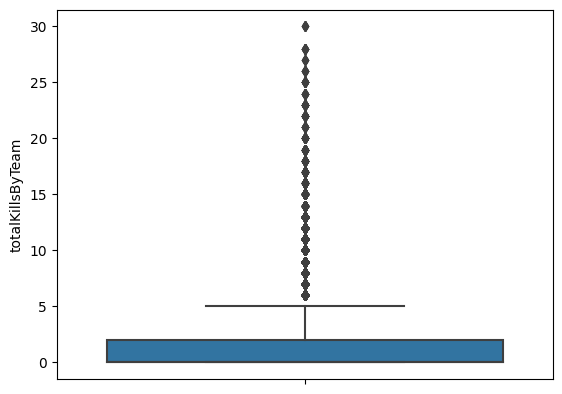

In [ ]:
median_totalKillsByTeam = train['totalKillsByTeam'].median()
train.loc[train['totalKillsByTeam'] > 33, 'totalKillsByTeam'] = median_totalKillsByTeam

sns.boxplot(y=train['totalKillsByTeam'])

Dealt with the Most obvious outliers.

---

##### **Distribution of Kills to Win Place**

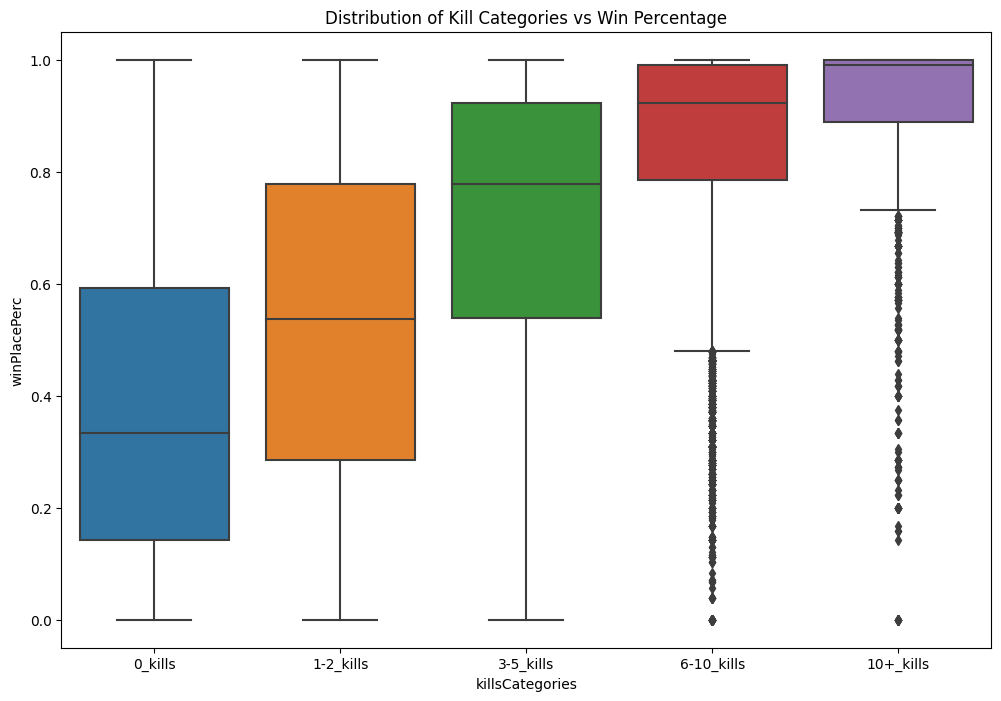

In [ ]:
kills =train.copy()

kills['killsCategories'] = pd.cut(kills['totalKillsByTeam'], [-1, 0, 2, 5, 10, 60], labels=['0_kills','1-2_kills', '3-5_kills', '6-10_kills', '10+_kills'])

kills.columns

plt.figure(figsize=(12,8))
plt.title("Distribution of Kill Categories vs Win Percentage")
sns.boxplot(x="killsCategories", y="winPlacePerc", data=kills)
plt.show()


---

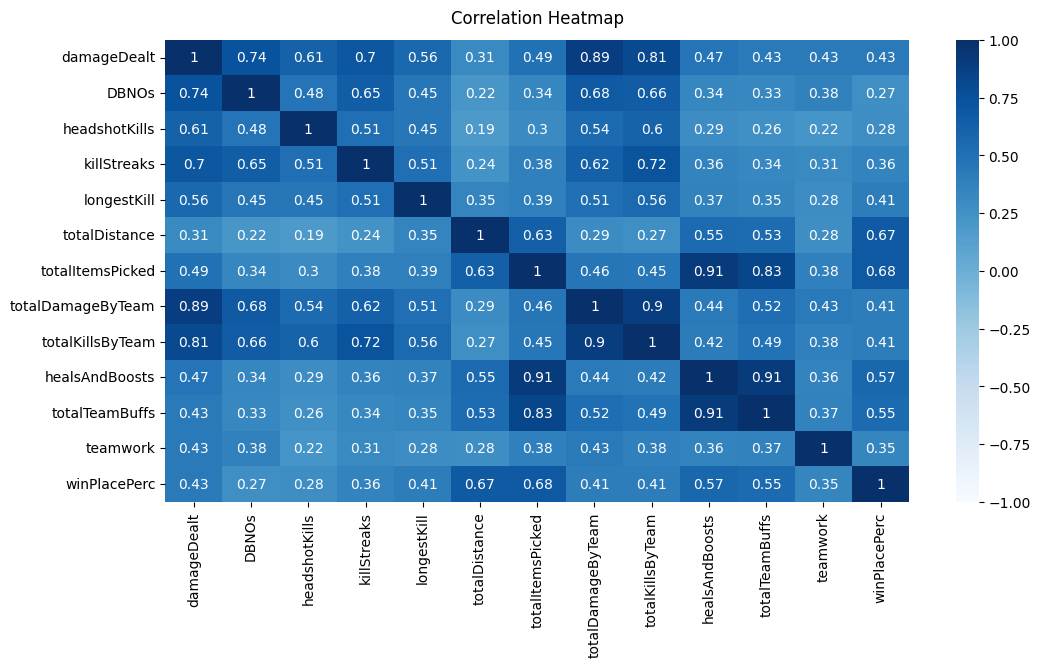

In [ ]:
plt.figure(figsize=(12, 6))
heatmap = sns.heatmap(train.corr().abs(), vmin=-1, vmax=1, annot=True, cmap='Blues')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

This is the Coorelation Heatmap for now.

In [ ]:
train.drop(['damageDealt','totalKillsByTeam','healsAndBoosts'], axis=1, inplace=True)

Dropped these features because they are considered as Multicollinearity and can cause several issues for the model's Accuracy.

---

#### **Encoding**

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 448616 entries, 0 to 459525
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype   
---  ------             --------------   -----   
 0   DBNOs              448616 non-null  float64 
 1   headshotKills      448616 non-null  float64 
 2   killStreaks        448616 non-null  float64 
 3   longestKill        448616 non-null  float64 
 4   matchType          448616 non-null  object  
 5   totalDistance      448616 non-null  float64 
 6   totalItemsPicked   448616 non-null  float64 
 7   totalDamageByTeam  448616 non-null  float64 
 8   totalTeamBuffs     448616 non-null  float64 
 9   teamwork           448616 non-null  float64 
 10  winPlacePerc       448616 non-null  float64 
 11  numGroups_bins     448616 non-null  category
dtypes: category(1), float64(10), object(1)
memory usage: 41.5+ MB


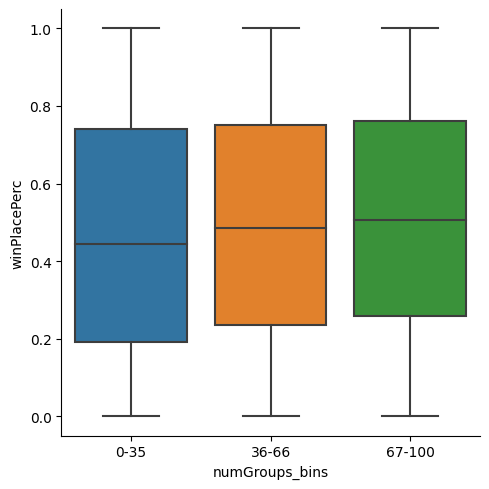

In [ ]:
sns.catplot(data=train, x='numGroups_bins', y='winPlacePerc', kind='box');

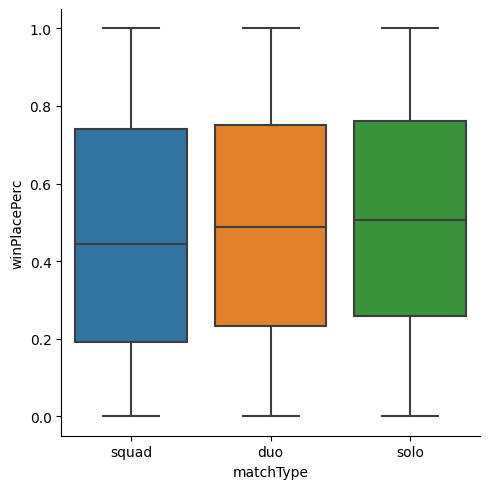

In [ ]:
sns.catplot(data=train, x='matchType', y='winPlacePerc', kind='box');

There is no such an order or ranking, so once I'll encode these 2 features using `OneHotEncoding`.

---

##### **Getting Dummies**

In [ ]:
train = pd.get_dummies(train, columns=['matchType','numGroups_bins'], drop_first=True)

---

In [ ]:
train.shape

(448616, 14)

In [ ]:
train.head()

,DBNOs,headshotKills,killStreaks,longestKill,totalDistance,totalItemsPicked,totalDamageByTeam,totalTeamBuffs,teamwork,winPlacePerc,matchType_solo,matchType_squad,numGroups_bins_36-66,numGroups_bins_67-100
0,0.0,0.0,0.0,0.00,244.8000,1.0,0.00,0.0,0.0,0.4444,0,1,0,0
1,0.0,0.0,0.0,0.00,1445.0445,5.0,91.47,0.0,0.0,0.6400,0,1,0,0
2,0.0,0.0,0.0,0.00,161.8000,2.0,68.00,0.0,1.0,0.7755,0,0,1,0
3,0.0,0.0,0.0,0.00,202.7000,3.0,32.90,0.0,0.0,0.1667,0,1,0,0
4,0.0,0.0,1.0,58.53,49.7500,2.0,100.00,0.0,0.0,0.1875,1,0,0,1


---

####**Normalization**

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

y = train['winPlacePerc']
Train = train.drop('winPlacePerc', axis=1)

X_std = scaler.fit_transform(Train)

X_std = pd.DataFrame(X_std, columns=Train.columns)
X = X_std
X

,DBNOs,headshotKills,killStreaks,longestKill,totalDistance,totalItemsPicked,totalDamageByTeam,totalTeamBuffs,teamwork,matchType_solo,matchType_squad,numGroups_bins_36-66,numGroups_bins_67-100
0,-0.583312,-0.385572,-0.779639,-0.457257,-0.712939,-0.991110,-0.791846,-0.638615,-0.489989,-0.434456,0.914878,-0.646621,-0.431629
1,-0.583312,-0.385572,-0.779639,-0.457257,-0.162833,-0.237328,-0.337407,-0.638615,-0.489989,-0.434456,0.914878,-0.646621,-0.431629
2,-0.583312,-0.385572,-0.779639,-0.457257,-0.750980,-0.802664,-0.454010,-0.638615,0.722239,-0.434456,-1.093042,1.546502,-0.431629
3,-0.583312,-0.385572,-0.779639,-0.457257,-0.732234,-0.614219,-0.628393,-0.638615,-0.489989,-0.434456,0.914878,-0.646621,-0.431629
4,-0.583312,-0.385572,0.621576,0.683460,-0.802336,-0.802664,-0.295028,-0.638615,-0.489989,2.301729,-1.093042,-0.646621,2.316807
...,...,...,...,...,...,...,...,...,...,...,...,...,...
448611,-0.583312,-0.385572,-0.779639,-0.457257,0.232501,0.704900,-0.263729,0.639276,1.934468,-0.434456,0.914878,-0.646621,-0.431629
448612,2.024133,-0.385572,2.022791,0.012439,-0.210519,0.328009,0.885956,0.213312,-0.489989,-0.434456,-1.093042,1.546502,-0.431629
448613,1.154984,1.280442,0.621576,0.829242,0.794594,-0.237328,2.556157,1.704185,-0.489989,-0.434456,0.914878,-0.646621,-0.431629
448614,-0.583312,-0.385572,-0.779639,-0.457257,-0.783003,-0.991110,0.321025,-0.638615,-0.489989,-0.434456,0.914878,-0.646621,-0.431629


---

# **Modeling**

In [ ]:
print(X.shape)
print(y.shape)

(448616, 13)
(448616,)


#### **Split the data into `Training` and `Testing`**

In [ ]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape #Printing the shape to make sure there is nothing wrong

((358892, 13), (89724, 13), (358892,), (89724,))

*Perfect!*

---

#### **Linear Regression**

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


# Make predictions on the testing data
y_pred = model.predict(X_test)

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

# Print evaluation metrics
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R2) Score:", r2)

Mean Absolute Error (MAE): 0.1535618611407117
Mean Squared Error (MSE): 0.03634628045804923
Root Mean Squared Error (RMSE): 0.19064700484940547
R-squared (R2) Score: 0.6028415963832627


Evaluation of `Linear Regression` is not bad, but I'll try another algorithms.

---

#### **RandomForestRegressor**

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf_reg = RandomForestRegressor(n_estimators=500, max_depth=9, random_state=42)
rf_reg.fit(X_train, y_train)

RandomForestRegressor(max_depth=9, n_estimators=500, random_state=42)

In [ ]:
# Make predictions on the testing data
y_pred = rf_reg.predict(X_test)

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

# Print evaluation metrics
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R2) Score:", r2)

Mean Absolute Error (MAE): 0.1106292953825225
Mean Squared Error (MSE): 0.02133146560156563
Root Mean Squared Error (RMSE): 0.14605295478546687
R-squared (R2) Score: 0.7674598998055916


##### **Hyperparameter Tuning - Grid Search**

In [ ]:
from sklearn.model_selection import GridSearchCV


# # define the parameter grid for GridSearchCV
# param_grid = {'n_estimators': [50, 100, 150],
#               'max_depth': [None, 5, 10, 15]}

# # create a RandomForestRegressor instance
# rf_reg = RandomForestRegressor()

# # perform cross-validation using GridSearchCV
# grid_search = GridSearchCV(rf_reg, param_grid=param_grid, cv=5)
# grid_search.fit(X_train, y_train)

# # get the best parameters and the best score from GridSearchCV
# best_params = grid_search.best_params_
# best_score = grid_search.best_score_

# # use the best parameters to fit the model and make predictions on the test set
# best_rf_reg = RandomForestRegressor(**best_params)
# best_rf_reg.fit(X_train, y_train)
# y_pred = best_rf_reg.predict(X_test)

# # calculate the mean squared error
# mse = mean_squared_error(y_test, y_pred)
# print("Mean Squared Error:", mse)

I got a better evaluation on the `RandomForestRegressor` Model than the `LinearRegression` model. Still, I will try another algorithm, the `XGBoost`.

---

#### **XGBoost Model**

In [ ]:
import xgboost as xgb

In [ ]:
# Train the XGBoost model
xgb_reg = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=143, max_depth=5, learning_rate=0.04, alpha=0.5, lambda_reg=0.1, random_state=42)
xgb_reg.fit(X_train, y_train)

[01:43:02] WARNING: ../src/learner.cc:767: 
Parameters: { "lambda_reg" } are not used.



XGBRegressor(alpha=0.5, base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, lambda_reg=0.1, learning_rate=0.04,
             max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=143, n_jobs=None, num_parallel_tree=None, ...)

##### **Hyperparameter Tuning - Randomized Search & Grid Search**

In [ ]:
from sklearn.model_selection import GridSearchCV #For the values of alpha and lambda_reg (Lasso & Ridge)

# # Define the grid of hyperparameters to search
# param_grid = {'alpha': [0, 0.1, 0.5, 1], 'reg_lambda': [0, 0.1, 0.5, 1]}

# # Use GridSearchCV to search for the best values of alpha and lambda
# grid_search = GridSearchCV(estimator=xgb_reg, param_grid=param_grid, cv=5, n_jobs=-1)
# grid_search.fit(X_train, y_train)

# # Print the best values of alpha and lambda found by GridSearchCV
# print("Best alpha:", grid_search.best_params_['alpha'])
# print("Best lambda:", grid_search.best_params_['reg_lambda'])

# # Use the best values of alpha and lambda to create an XGBoost Regression model
# best_xgb_reg = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=143, max_depth=5, learning_rate=0.04, alpha=grid_search.best_params_['alpha'], reg_lambda=grid_search.best_params_['reg_lambda'], random_state=42)

# # Fit the XGBoost Regression model to the training data
# best_xgb_reg.fit(X_train, y_train)

# # Make predictions on the testing data
# y_pred = best_xgb_reg.predict(X_test)

# # Evaluate the performance of the model using mean squared error
# mse = mean_squared_error(y_test, y_pred)
# print("Mean Squared Error:", mse)

In [ ]:
from sklearn.model_selection import RandomizedSearchCV #for n_estimators, max_depth, and other parameters ...

# # define the parameter distribution for RandomizedSearchCV
# param_dist = {'n_estimators': [100, 200, 300],
#               'max_depth': [3, 5, 7],
#               'learning_rate': [0.05, 0.1, 0.15],
#               'subsample': [0.6, 0.8, 1],
#               'colsample_bytree': [0.6, 0.8, 1],
#               'gamma': [0, 1, 5]}

# # create an XGBRegressor instance
# xgb_reg = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)

# # perform randomized search using RandomizedSearchCV
# random_search = RandomizedSearchCV(estimator=xgb_reg, param_distributions=param_dist, n_iter=100, cv=5, random_state=42)
# random_search.fit(X_train, y_train)

# # print the best hyperparameters
# print("Best hyperparameters:", random_search.best_params_)

# # make predictions on the testing data using the best model
# y_pred = random_search.predict(X_test)

# # evaluate the performance of the model using mean squared error
# mse = mean_squared_error(y_test, y_pred)
# print("Mean Squared Error:", mse)


In [ ]:
# Make predictions on the testing data
y_pred = xgb_reg.predict(X_test)

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

# Print evaluation metrics
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R2) Score:", r2)

Mean Absolute Error (MAE): 0.10829042037944976
Mean Squared Error (MSE): 0.020796058851232608
Root Mean Squared Error (RMSE): 0.1442083868962988
R-squared (R2) Score: 0.7727599789912986


I got a better Evaluation using `XGBoost Regressor`! So I'll Choose the `xgb_reg` Model.

---

##**Pickle**

### **Saving The `xgb_reg` Model**

In [ ]:
filename = 'PUBG_model.sav'
pickle.dump(xgb_reg, open(filename, 'wb'))

### **saving the Columns**

In [ ]:
X_train.columns

Index(['DBNOs', 'headshotKills', 'killStreaks', 'longestKill', 'totalDistance',
       'totalItemsPicked', 'totalDamageByTeam', 'totalTeamBuffs', 'teamwork',
       'matchType_solo', 'matchType_squad', 'numGroups_bins_36-66',
       'numGroups_bins_67-100'],
      dtype='object')

In [ ]:
columns = ['DBNOs', 'headshotKills', 'killStreaks', 'longestKill', 'totalDistance','totalItemsPicked', 'totalDamageByTeam', 'totalTeamBuffs', 'teamwork','matchType_solo', 'matchType_squad', 'numGroups_bins_36-66','numGroups_bins_67-100']

In [ ]:
with open('columns.sav', 'wb') as f:
    pickle.dump(columns, f)

### **Saving the Scaler**

In [ ]:
with open('scaler.sav', 'wb') as f:
    pickle.dump(scaler, f)

# **Building a Predictive System**

In [ ]:
def get_placement_prediction(input_data):
    # change the input data to numpy array and reshape
    input_data_as_np_array = np.asarray(input_data).reshape(1,-1)

    # normalize the input data using the scaler
    input_data_normalized = scaler.transform(input_data_as_np_array)

    prediction = xgb_reg.predict(input_data_normalized)[0]
    if prediction > 0.4:
        return '1st-5th' 
    elif prediction > 0.3:
        return '6th-10th'
    elif prediction > 0.2:
        return '11th-20th' 
    elif prediction > 0.1:
        return '21st-30th' 
    else:
        return '31th-100th'

# '''
# Note: The Model that I'v made is kinda tough, it doesn't give a High
#       Placement (1st-5th) because it almost never predicts a value that is > 0.45 ,
#       So I decided to set the threshold of these very High placements as 0.4
#       because I found that it is the best value to suit it, and then I made the other 
#       thresholds for the other placements predictions descendingly
# '''

In [ ]:
input_data = [3, 1, 2, 100, 10, 20, 200, 2, 0.8, 1, 0, 0, 1]
placement_prediction = get_placement_prediction(input_data)
print(f"The predicted placement is {placement_prediction}")

The predicted placement is 6th-10th


/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


<img src="https://c4.wallpaperflare.com/wallpaper/793/738/376/pubg-video-games-helmet-reflection-wallpaper-preview.jpg" alt="Paris" style="display: block;margin-left: auto;margin-right: auto;width: 100%;">